# Using Linear Regression to Find Avenues for Data Analysis

### Import Libraries

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from sklearn.linear_model import LinearRegression


### Import Dataset

In [16]:
rt_df = pd.read_csv('data/rotten_tomatoes_movies.csv')
rt_df.describe()

,runtime,tomatometer_rating,tomatometer_count,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
count,17398.000000,17668.000000,17668.000000,17416.000000,1.741500e+04,17712.000000,17712.000000,17712.000000
mean,102.214048,60.884763,57.139801,60.554260,1.439401e+05,14.586326,36.374831,20.703139
std,18.702511,28.443348,68.370047,20.543369,1.763577e+06,15.146349,52.601038,30.248435
min,5.000000,0.000000,5.000000,0.000000,5.000000e+00,0.000000,0.000000,0.000000
25%,90.000000,38.000000,12.000000,45.000000,7.075000e+02,3.000000,6.000000,3.000000
50%,99.000000,67.000000,28.000000,63.000000,4.277000e+03,8.000000,16.000000,8.000000
75%,111.000000,86.000000,75.000000,78.000000,2.498800e+04,23.000000,44.000000,24.000000
max,266.000000,100.000000,574.000000,100.000000,3.579764e+07,69.000000,497.000000,303.000000


Create lists

In [27]:
rt_pruned_df = rt_df.dropna(subset=["tomatometer_rating", "audience_rating"])
tomatometer_rating = rt_pruned_df["tomatometer_rating"].values.reshape(-1,1)
audience_rating = rt_pruned_df["audience_rating"].values.reshape(-1,1)

### MatPlotLib and sklearn implementation

Create Linear Regression

In [30]:
lr = LinearRegression()
lr.fit(tomatometer_rating, audience_rating)
audience_rating_predicted = lr.predict(tomatometer_rating)

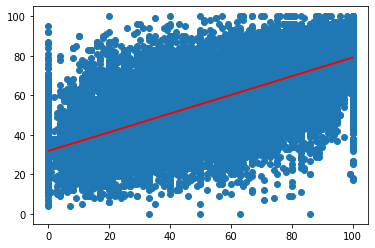

In [29]:
plt.scatter(tomatometer_rating, audience_rating)
plt.plot(tomatometer_rating, audience_rating_predicted, color="red")
plt.show()

### Plotly implementation

Comparing the Audience Rating against the overall Tomatometer score (which includes the critic reviews converted to a numerical score)

In [36]:
fig = px.scatter(
  rt_pruned_df,
  x="tomatometer_rating",
  y="audience_rating",
  title="Audience Rating vs Overall Tomatometer Score",
  trendline="ols",
  trendline_color_override="red",
  width=1000
  )
fig.show()

Weak positive correlation (makes some sense, as the audience rating is included in the tomatometer rating)

How are there films with 100% tomatometer and then ~17% audience rating? And vice versa?

In [37]:
fig = px.box(
  rt_pruned_df,
  x="tomatometer_rating",
  y="audience_rating",
  title="Audience Rating vs Overall Tomatometer Score",
  # trendline="ols",
  # trendline_color_override="red",
  width=1000
  )
fig.show()